### Some plots of population histograms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

#Offline use:
sys.path.append('C:/Users/conor/Documents/Github/Project/plugins')

# #Screw you and your memory usage
# peaks_031693 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031693.npy",allow_pickle = True)
# peaks_031691 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031691.npy",allow_pickle = True)
# peaks_031690 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031690.npy",allow_pickle = True)
# peaks_031688 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031688.npy",allow_pickle = True)
# peaks_031687 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031687.npy",allow_pickle = True)
# peaks_031686 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031686.npy",allow_pickle = True)
# peaks_031685 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031685.npy",allow_pickle = True)
# peaks_031684 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031684.npy",allow_pickle = True)
# peaks_031683 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031683.npy",allow_pickle = True)
# peaks_031682 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031682.npy",allow_pickle = True)
# peaks_031681 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031681.npy",allow_pickle = True)
# peaks_031680 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031680.npy",allow_pickle = True)
# peaks_031679 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031679.npy",allow_pickle = True)

runs = np.load("C:/Users/conor/Downloads/Project (offline)/downloaded_data/runs.npy",allow_pickle = True)

#Note that only 'runs' uses pandas cause I needed to assign the column names in a nice and easy way. 
#Pandas hates the formatting of the 'peaks' data from straxen, specifically the 'data' data-type (like waveform stuff), 
#so everything else just had to be some kind of structured numpy array.
#I guess I could have made runs with numpy also, ¯\_(ツ)_/¯

#On Midway or whatever:
# import getpass
# user = getpass.getuser()
# sys.path.append('/home/{user}/project_code/plugins') #Midway 

# runs = np.load("/home/{user}/project_code/strax_data/runs.npy", allow_pickle = True)
# peaks_031693 = np.load("/home/{user}/project_code/strax_data/peaks_031693.npy", allow_pickle = True)
#Etc.

#Import useful modules
# import data_selection as ds #data selection functions

#Configure runs
runs_df = pd.DataFrame(runs, columns = ["name", "number", "mode", "end", "source", "start", "tags", 
                                        "livetime", "peak_basics_available", "peaks_available", "event_basics_available"])


In [ ]:
base_path = "C:/Users/conor/Documents/Github/Project/processed_data"

exclude = {31689, 31692}
run_ids = [r for r in range(31679, 31694) if r not in exclude]
run_ids = sorted(run_ids, reverse=True)  # Sort in descending order

peaks_list, pS2s_list, DEs_list, S1s_list = [], [], [], []

for run_id in run_ids: 
    run_str = f"{run_id:06d}"
    peaks_list.append(np.load(f"{base_path}/peaks_{run_str}.npy", allow_pickle=True))
    # pS2s_list.append(np.load(f"{base_path}/pS2s_{run_str}.npy", allow_pickle=True))
    # DEs_list.append(np.load(f"{base_path}/DEs_{run_str}.npy", allow_pickle=True))
    # S1s_list.append(np.load(f"{base_path}/S1s_{run_str}.npy", allow_pickle=True))
    # vetos_list.append(np.load(f"{base_path}/vetos_{run_str}.npy", allow_pickle=True))

print(f"Loaded runs: {', '.join(f'{r:06d}' for r in run_ids)}")

In [ ]:
pS2s_ku_91, _, DEs_ku_91, _, = ds.data_selection_ku(runs_df.iloc[1], peaks_list[1])

In [ ]:
path = "C:/Users/conor/Documents/Github/Project/processed_data"

np.save(f"{path}/pS2s_ku_031691", pS2s_ku_91)
np.save(f"{path}/DEs_ku_031691", DEs_ku_91)

In [ ]:
pS2s_93_ku, _, DEs_93_ku, _= ds.data_selection_ku(runs_df.iloc[0], peaks_list[0])
np.save(f"{path}/pS2s_ku_031693", pS2s_93_ku)
np.save(f"{path}/DEs_ku_031693", DEs_93_ku)

In [4]:
peaks_031693 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031693.npy",allow_pickle = True)

In [2]:

import matplotlib.patheffects as path_effects
from matplotlib.colors import LogNorm
from multihist import Hist1d, Histdd

avg_livetime_sec = np.mean([(runs_df['end'].iloc[i].value - runs_df['start'].iloc[i].value) for i in range(len(runs_df))])/1e9
print(f"Average livetime per run: {avg_livetime_sec:.1f} s")

def plot_area_width_histogram(
    peaks,
    livetime_sec,
    pe_bins=np.logspace(0, 7, 120),
    width_bins=np.geomspace(2, 1e5, 120),
    extra_labels=tuple(),
    rate_range=(1e-4, 1),
    figsize=(7, 5),
):
    """
    Plot (area, width) histogram of peak rate.
    
    Parameters
    ----------
    peaks : array-like
        Peaks with fields 'area' and 'range_50p_area'.
    livetime_sec : float
        Livetime in seconds (for normalizing rates).
    pe_bins : array-like
        Bin edges for peak area [PE].
    width_bins : array-like
        Bin edges for range_50p_area [ns].
    extra_labels : list of tuples
        Extra text labels as (area, width, text, color).
    rate_range : tuple
        Color scale range for rates [peaks/(bin*s)].
    figsize : tuple
        Figure size.
    """

    mh = Histdd(
        peaks,
        dimensions=(
            ("area", pe_bins),
            ("range_50p_area", width_bins),
        ),
    )

    fig, ax = plt.subplots(figsize=figsize)

    (mh / livetime_sec).plot(
        norm=LogNorm(vmin=rate_range[0], vmax=rate_range[1]),
        colorbar=False,                 # <— turn off auto colorbar
    )

    # build your own colorbar from the plotted mappable
    mappable = ax.collections[-1] if ax.collections else ax.images[-1]
    cbar = fig.colorbar(mappable, ax=ax)
    cbar.ax.tick_params(labelsize=12)          # tick label size
    cbar.set_label("Peaks / (bin * s)", fontsize=14)  

    # styling
    ax.set_facecolor("k")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("Area [PE]", fontsize =14)
    ax.set_ylabel("Range 50% area [ns]", fontsize=14)

    # # Add standard physics labels
    # labels = [
    #     (3, 150, "1PE\npileup", "w"),
    #     (30, 200, "1e", "w"),
    #     (100, 1000, "n-e", "w"),
    #     (3000, 2.5e4, "e-bursts", "w"),
    #     (1200, 50, "S1", "w"),
    #     (2e5, 800, "S2", "w"),
    # ] + list(extra_labels)

    # for x, w, text, color in labels:
    #     t = ax.text(
    #         x, w, text, color=color,
    #         va="center", ha="center", fontsize=14,
    #     )
    #     # Add outline (stroke)
    #     t.set_path_effects([
    #         path_effects.Stroke(linewidth=2, foreground='black'),
    #         path_effects.Normal()
    #     ])

    fig.tight_layout()
    return fig, ax

livetime= (runs_df['end'].iloc[0].value - runs_df['start'].iloc[0].value)/1e9
# fig, ax = plot_area_width_histogram(
#     peaks=peaks_031693,
#     livetime_sec=livetime)

Average livetime per run: 1802.5 s


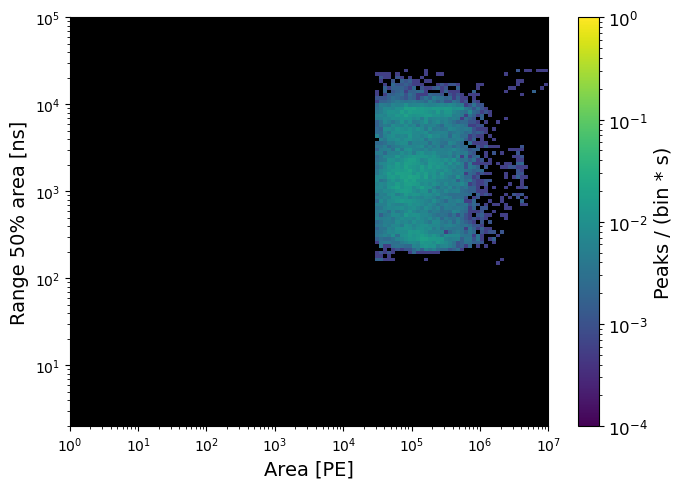

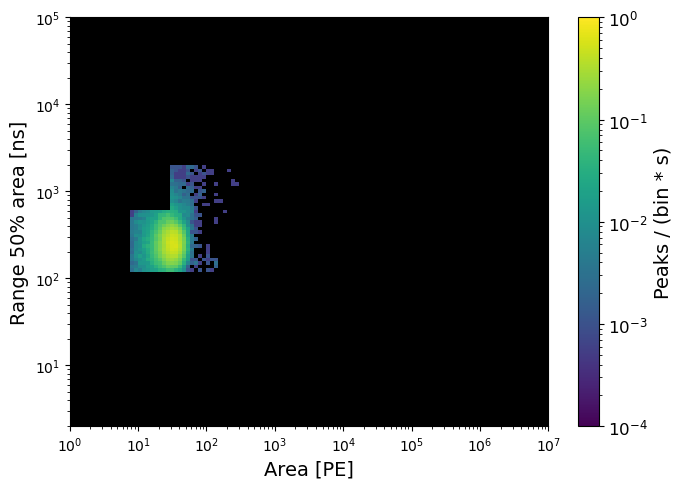

In [32]:
pS2s_ku_93 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/pS2s_ku_031693.npy",allow_pickle = True)
DEs_ku_93 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/DEs_ku_031693.npy",allow_pickle = True)

fig, ax = plot_area_width_histogram(
    peaks=pS2s_ku_93,
    livetime_sec=livetime)

fig, ax = plot_area_width_histogram(
    peaks=DEs_ku_93,
    livetime_sec=livetime)

<Axes: xlabel='Area [PE]', ylabel='Range 50% area [ns]'>

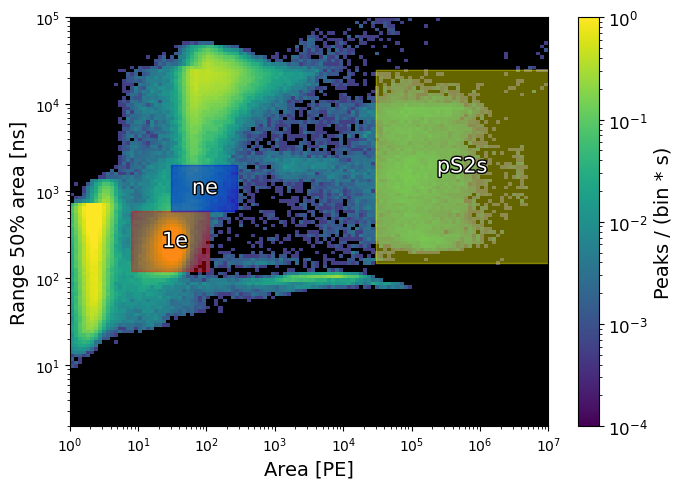

In [24]:
def plot_selection(xrange, yrange, axes, col, label):
    """Draws the selection as a filled in box on any plot
    
    xrange = tuple of min and max x-axis values from plot from which data is selected
    yrange = tuple of min and max y-axis values from plot from which data is selected
    axes = plot on which selection is to be visualized
    col = color of the filled in box
    """
    low_x, high_x = xrange
    low_y, high_y = yrange
    x = np.arange(low_x, high_x, 50)
    y = np.full(len(x), low_y)
    y2 = np.full(len(x), high_y)
    axes.fill_between(x, y, y2, alpha = 0.4, color = col)

    mid_x = np.sqrt(low_x * high_x)
    mid_y = np.sqrt(low_y * high_y)

    t = axes.text(mid_x, mid_y, label, ha = 'center', 
              va = 'center', fontsize = 15, color = 'white')
    t.set_path_effects([
            path_effects.Stroke(linewidth=2, foreground='black'),
            path_effects.Normal()
    ])
    return axes

fig, ax = plot_area_width_histogram(
    peaks=peaks_031693,
    livetime_sec=livetime)

plot_selection((3e4, 1e7), (1.5e2, 2.5e4), ax, "yellow", label = "pS2s")
plot_selection((8e0, 1.5e2), (1.2e2, 6e2), ax, "red", label = "1e")
plot_selection((3e1, 3e2), (6e2, 2e3), ax, "blue", label = "ne")

In [15]:
pS2s_93 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/pS2s_031693.npy",allow_pickle = True)
DEs_93 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/DEs_031693.npy",allow_pickle = True)

pS2s_93 = (pS2s_93[~((pS2s_93['range_50p_area'] > 4e4) & (pS2s_93['area'] < 2e6))])
# fig, ax = plot_area_width_histogram(
#     peaks=pS2s_93,
#     livetime_sec=livetime
# )

# fig, ax = plot_area_width_histogram(
#     peaks=DEs_93,
#     livetime_sec=livetime
# )


In [20]:
(16319-len(pS2s_93))/16319*100

0.9988357129726085

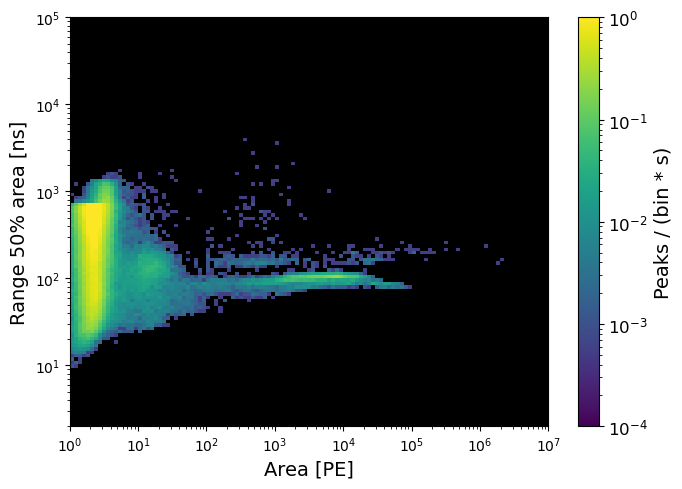

In [5]:
# peaks_93 = np.load("C:/Users/conor/Documents/Github/Project/processed_data/peaks_031693.npy",allow_pickle = True)

remaining = peaks_031693[(peaks_031693['type'] != 2)]

fig, ax = plot_area_width_histogram(
    peaks=remaining,
    livetime_sec=livetime
)

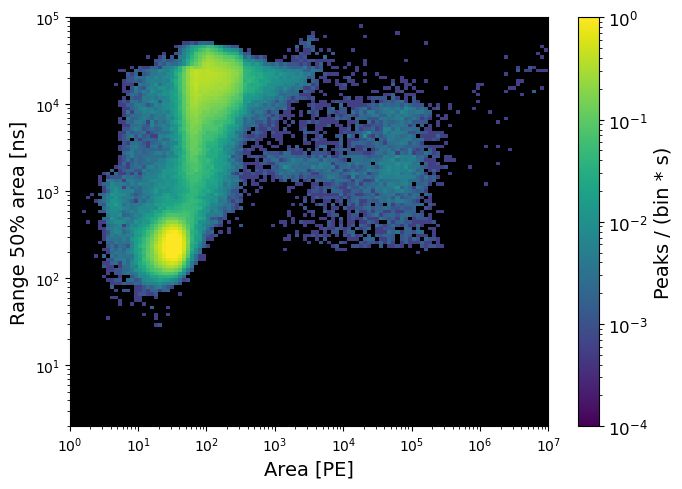

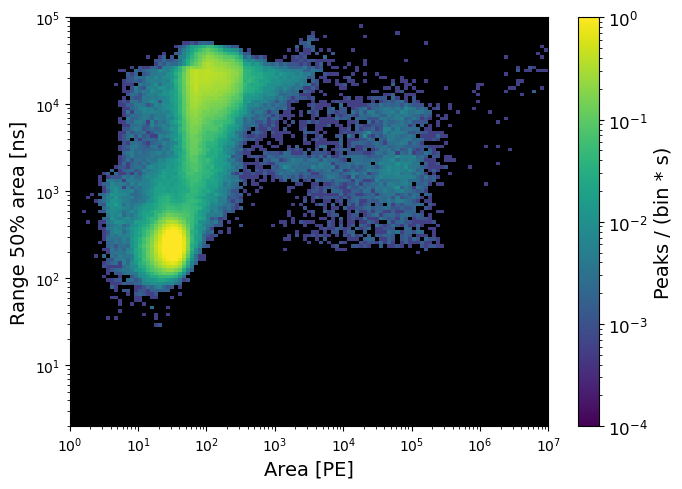

In [28]:
all_des = peaks_031693[np.isin(peaks_031693['subtype'], [20, 21, 23, 271, 272, 273])]
DEs_final = DEs_93

#Want to plot all DEs that aren't in the final DEs selection
# Create a mask for signals NOT in the final DEs
mask = ~np.isin(all_des['time'], DEs_final['time'])

# Plot the excluded ones
fig, ax = plot_area_width_histogram(
    peaks=all_des[mask],
    livetime_sec=livetime
)

fig1, ax1 = plot_area_width_histogram(
    peaks=all_des,
    livetime_sec=livetime
)

# fig, ax = plot_area_width_histogram(
#     peaks=all_des[mask],
#     livetime_sec=livetime
# )

In [30]:
np.array_equal(all_des['time'], all_des[mask]['time'])
print(len(all_des))
print(len(all_des[mask]))

334605
288120
